In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import radians, sin, cos, sqrt, atan2
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [2]:
house_listings = pd.read_csv('/Users/ruoxili/Downloads/HouseListings-Top45Cities-10292023-kaggle.csv', encoding='latin1')

In [3]:
house_listings

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0
...,...,...,...,...,...,...,...,...,...,...
35763,Halifax,439900.0,301 60 Walter Havill Drive,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35764,Halifax,6990000.0,1160 Rockcliffe Street,5,5,Nova Scotia,431479,44.8857,63.1005,86753.0
35765,Halifax,419900.0,212 60 Walter Havill Drive,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35766,Halifax,949900.0,10 Idlewylde Road,3,1,Nova Scotia,431479,44.8857,63.1005,86753.0


## Data Cleaning - remove outlier points using z-score

In [4]:
house_listings['Price_Zscore'] = zscore(house_listings['Price'])

threshold = 1.5

house_listings = house_listings[abs(house_listings['Price_Zscore']) <= threshold]

house_listings.drop(columns=['Price_Zscore'], inplace=True)

/var/folders/rm/b98qqlj91xjbfgyzx8m25fzm0000gn/T/ipykernel_11043/62541006.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_listings.drop(columns=['Price_Zscore'], inplace=True)


In [5]:
house_listings

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0
...,...,...,...,...,...,...,...,...,...,...
35762,Halifax,580000.0,3500 Claremont Street,3,1,Nova Scotia,431479,44.8857,63.1005,86753.0
35763,Halifax,439900.0,301 60 Walter Havill Drive,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35765,Halifax,419900.0,212 60 Walter Havill Drive,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35766,Halifax,949900.0,10 Idlewylde Road,3,1,Nova Scotia,431479,44.8857,63.1005,86753.0


## EDA - exploring possible correlations with the data provided.

### Summary Statistics

##### Number of houses by number of bedrooms:

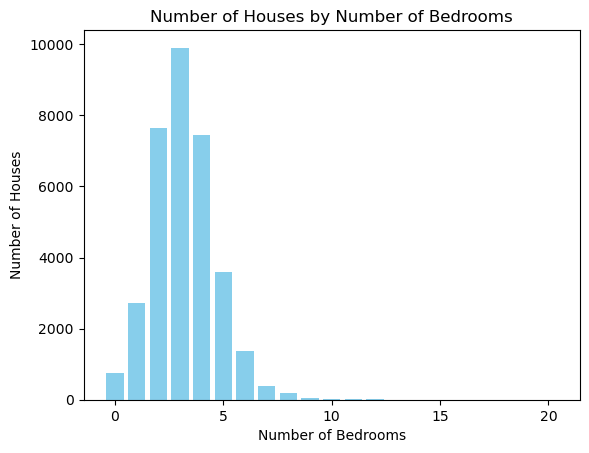

In [6]:
bedroom_count = house_listings.groupby('Number_Beds').size()
plt.bar(bedroom_count.index, bedroom_count.values, color='skyblue')

plt.title('Number of Houses by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Houses');

##### Removing the outliers:

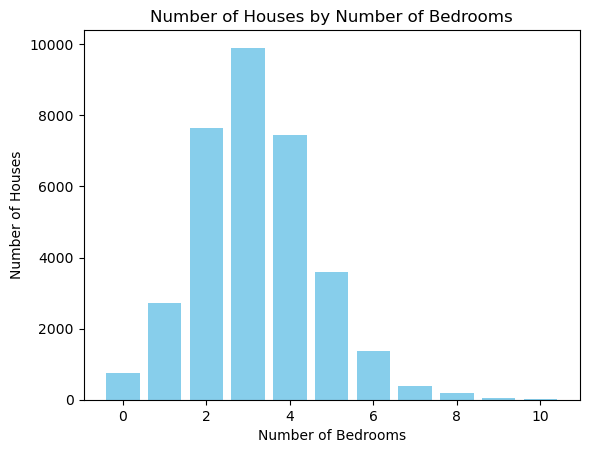

In [7]:
bedroom_filtered = house_listings[house_listings['Number_Beds'] <= 10]
bedroom_counts = bedroom_filtered['Number_Beds'].value_counts().sort_index()

# plotting the data
plt.bar(bedroom_counts.index, bedroom_counts.values, color='skyblue')
plt.title('Number of Houses by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Houses');

##### From this, we can see a normal distribution where the mode is 3 bedrooms.

##### Population distribution by cities:

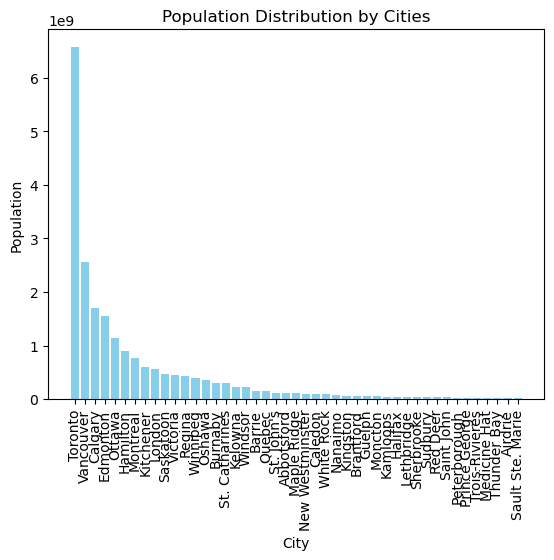

In [8]:
city_population = house_listings.groupby('City')['Population'].sum()
city_population_sorted = city_population.sort_values(ascending=False)
plt.bar(city_population_sorted.index, city_population_sorted.values, color='skyblue')

plt.title('Population Distribution by Cities')
plt.xlabel('City')
plt.ylabel('Population')
plt.xticks(rotation=90);

##### As shown, Toronto has the highest population, followed by Vancouver, Calgary and Edmonton. All are major cities of the country. A high population comes with a higher demand for housing. This can in turn cause higher prices in housing, due to theories of demand and supply.

##### Median family income by cities:

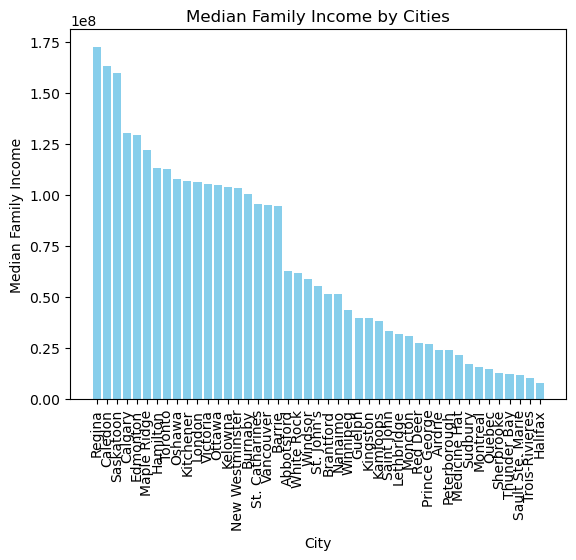

In [9]:
city_income = house_listings.groupby('City')['Median_Family_Income'].sum()
city_income_sorted = city_income.sort_values(ascending=False)
plt.bar(city_income_sorted.index, city_income_sorted.values, color='skyblue')

plt.title('Median Family Income by Cities')
plt.xlabel('City')
plt.ylabel('Median Family Income')
plt.xticks(rotation=90);

##### As shown, there is less of an obvious pattern when it comes to the median family income in different Canadian cities.

##### Number of houses by cities:

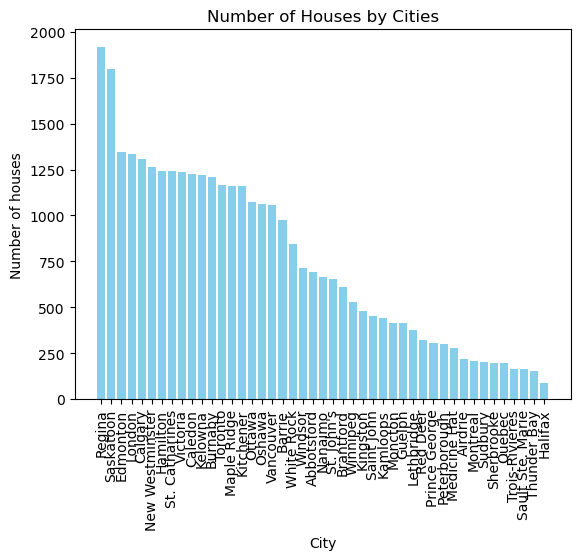

In [10]:
city_houses = house_listings.groupby('City').size()
city_houses_sorted = city_houses.sort_values(ascending=False)
plt.bar(city_houses_sorted.index, city_houses_sorted.values, color='skyblue')

plt.title('Number of Houses by Cities')
plt.xlabel('City')
plt.ylabel('Number of houses')
plt.xticks(rotation=90);

##### As shown, despite very distinct differences in population between the cities seen previously, the number of houses between cities have less of a drastic variation. This could be something that affects the housing prices in the different cities. However, it's also important to take number of beds and baths into account since different houses can fit different numbers of residents.

#### Price Analysis

##### Average house price by cities

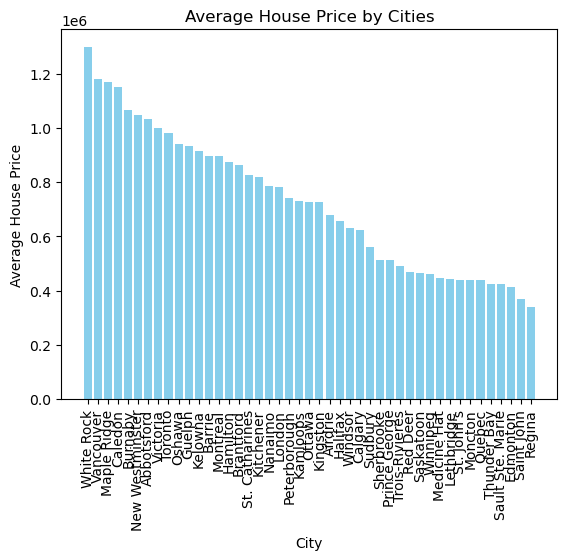

In [11]:
city_price = house_listings.groupby('City')['Price'].mean()
city_price_sorted = city_price.sort_values(ascending=False)
plt.bar(city_price_sorted.index, city_price_sorted.values, color='skyblue')

plt.title('Average House Price by Cities')
plt.xlabel('City')
plt.ylabel('Average House Price')
plt.xticks(rotation=90);

#### Population size by cities

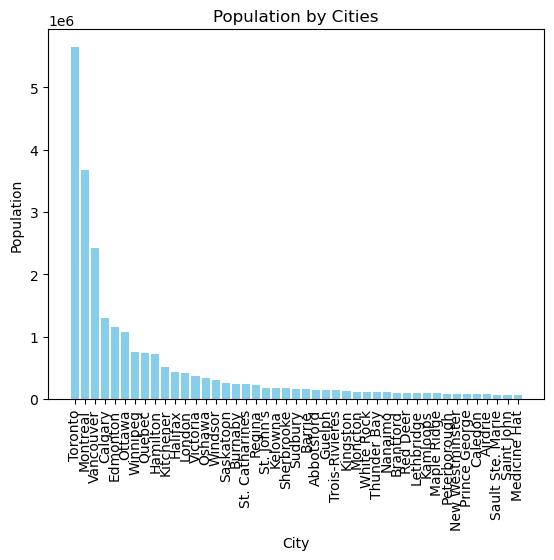

In [12]:
city_pop = house_listings.groupby('City')['Population'].mean()
city_pop_sorted = city_pop.sort_values(ascending=False)
plt.bar(city_pop_sorted.index, city_pop_sorted.values, color='skyblue')

plt.title('Population by Cities')
plt.xlabel('City')
plt.ylabel('Population')
plt.xticks(rotation=90);

##### As shown, the main cities in the country, such as Toronto, Montreal and Vancouver have significantly higher populations compared to the other cities. This means that disregarding the city sizes (due to such a big spike in population), it can be expected that a greater population would cause a higher housing price.

### With the ideas generated from looking at the previous trends, the various factors that may affect housing prices in Canada will be investigated.

#### Effect of population on housing prices

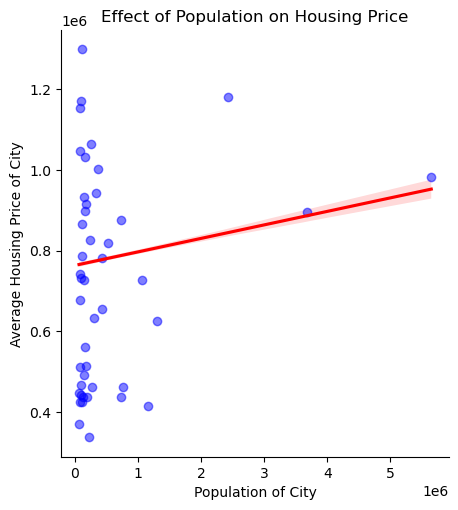

In [13]:
city_avg_price = house_listings.groupby('City')['Price'].mean().reset_index()
city_avg_price = pd.merge(city_avg_price, house_listings[['City', 'Population']], on='City').drop_duplicates()

sns.lmplot(x='Population', y='Price', data=house_listings, scatter=False, line_kws={'color': 'red'})
plt.scatter(city_avg_price['Population'], city_avg_price['Price'], color='blue', label='Average Price by City', alpha=0.5)

plt.title('Effect of Population on Housing Price')
plt.xlabel('Population of City')
plt.ylabel('Average Housing Price of City')

plt.show()

##### Although there is a positive correlation as predicted, the trend seems to be extremely weak and unreliable. We will omit this factor for the prediction model.

#### Effect of family income on housing prices

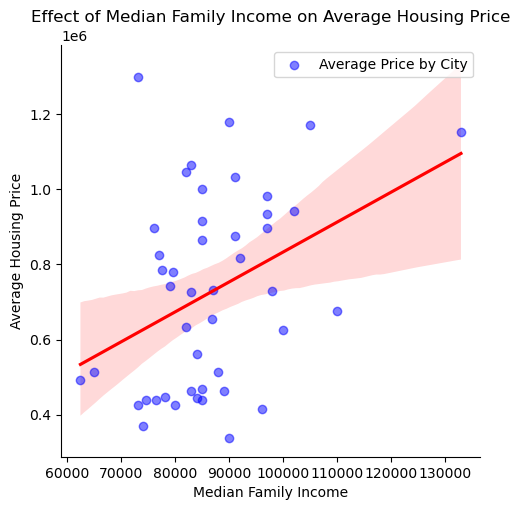

In [14]:
city_avg_price = house_listings.groupby('City')['Price'].mean().reset_index()

city_avg_price = pd.merge(city_avg_price, house_listings[['City', 'Median_Family_Income']], on='City').drop_duplicates()

sns.lmplot(x='Median_Family_Income', y='Price', data=city_avg_price, scatter=False, line_kws={'color': 'red'})
plt.scatter(city_avg_price['Median_Family_Income'], city_avg_price['Price'], color='blue', label='Average Price by City', alpha=0.5)

plt.title('Effect of Median Family Income on Average Housing Price')
plt.xlabel('Median Family Income')
plt.ylabel('Average Housing Price')
plt.legend()

plt.show()

In [15]:
X = city_avg_price[['Median_Family_Income']]
y = city_avg_price['Price']
model = LinearRegression().fit(X, y)

# Calculate R^2 value
r_squared = model.score(X, y)
print("R^2 value:", r_squared)

R^2 value: 0.13884555498783668


##### The R^2 value for this factor is very low, showing a very weak trend for this factor as well.

#### Effect of number of bed on housing prices

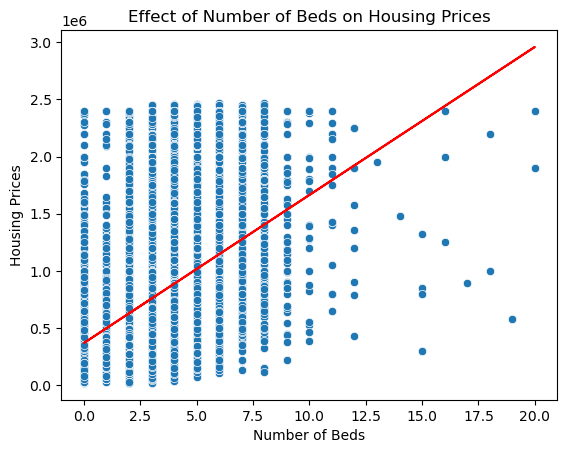

In [16]:
X = house_listings[['Number_Beds']]
y = house_listings['Price']
model = LinearRegression().fit(X, y)

sns.scatterplot(data=house_listings, x='Number_Beds', y='Price')
plt.plot(X, model.predict(X), color='red') 
plt.title('Effect of Number of Beds on Housing Prices')
plt.xlabel('Number of Beds')
plt.ylabel('Housing Prices')

plt.show()

##### As shown, the effect of number of beds on housing prices does not have great results either.

#### Effect of number of baths on housing prices

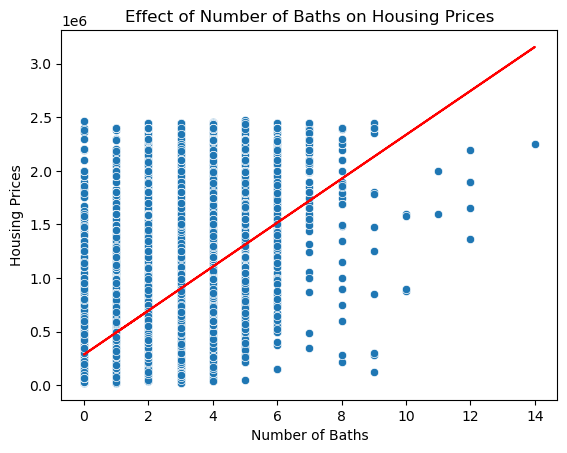

In [17]:
X = house_listings[['Number_Baths']]
y = house_listings['Price']
model = LinearRegression().fit(X, y)

sns.scatterplot(data=house_listings, x='Number_Baths', y='Price')
plt.plot(X, model.predict(X), color='red') 
plt.title('Effect of Number of Baths on Housing Prices')
plt.xlabel('Number of Baths')
plt.ylabel('Housing Prices')

plt.show()

##### Similarly, the effect of number of baths on housing prices does not have great results either. It is a good idea to perform some feature engineering to create new trendlines that will make the model more accurate.

### Feature Engineering

#### New column - Population per capita, effect of PPC on housing prices

/var/folders/rm/b98qqlj91xjbfgyzx8m25fzm0000gn/T/ipykernel_11043/2278949003.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_listings['Population_per_Capita'] = house_listings['City'].map(city_size)
/var/folders/rm/b98qqlj91xjbfgyzx8m25fzm0000gn/T/ipykernel_11043/2278949003.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_listings['Population_per_Capita'] = house_listings['Population'] / house_listings['Population_per_Capita']


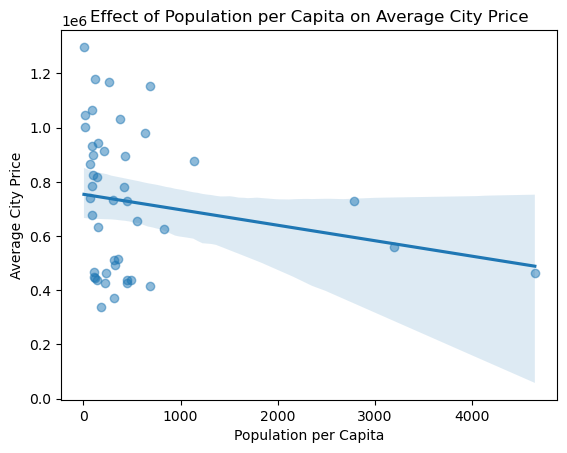

In [18]:
city_size = {
    'Toronto': 630.20,  # Size in square kilometers
    'Vancouver': 114.97,
    'Montreal': 431.50,
    'Calgary': 825.29,
    'Edmonton': 684.37,
    'Ottawa': 2790,
    'Winnipeg': 4648.6,
    'Quebec': 485,
    'Hamilton': 1138.11,
    'Kitchener': 136.89,
    'Halifax': 549.38,
    'London': 420.57,
    'Victoria': 19.47,
    'Oshawa': 145.68,
    'Windsor': 146.3,
    'Saskatoon': 228.13,
    'Burnaby': 90.61,
    'St. Catharines': 96.13,
    'Regina': 179.97,
    'St. John\'s': 446.04,
    'Kelowna': 211.82,
    'Sherbrooke': 353.81,
    'Sudbury': 3200.46,
    'Barrie': 99.04,
    'Abbotsford': 375.55,
    'Guelph': 87.22,
    'Trois-Rivieres': 326.98,
    'Kingston': 451.19,
    'Moncton': 141.17,
    'White Rock': 5.13,
    'Thunder Bay': 447.5,
    'Nanaimo': 91.3,
    'Brantford': 72.44,
    'Red Deer': 104.29,
    'Lethbridge': 122.36,
    'Kamloops': 299.23,
    'Maple Ridge': 266.79,
    'Peterborough': 64.39,
    'New Westminster': 15.63,
    'Prince George': 318.26,
    'Caledon': 688.17,
    'Airdrie': 84.57,
    'Sault Ste. Marie': 223.27,
    'Saint John': 315.93,
    'Medicine Hat': 112.04,
}

house_listings['Population_per_Capita'] = house_listings['City'].map(city_size)

house_listings['Population_per_Capita'] = house_listings['Population'] / house_listings['Population_per_Capita']

city_avg_price = house_listings.groupby('City')['Price'].mean().reset_index()

city_avg_price['Population_per_Capita'] = city_avg_price['City'].map(city_size)

sns.regplot(x='Population_per_Capita', y='Price', data=city_avg_price, scatter_kws={'alpha':0.5})
plt.title('Effect of Population per Capita on Average City Price')
plt.xlabel('Population per Capita')
plt.ylabel('Average City Price')
plt.show()

In [19]:
X = city_avg_price[['Population_per_Capita']]
y = city_avg_price['Price']
model = LinearRegression().fit(X, y)

# Calculate R^2 value
r_squared = model.score(X, y)
print("R^2 value:", r_squared)

R^2 value: 0.03732432021333454


#### New column - Total number of rooms, effect of number of rooms on housing prices

/var/folders/rm/b98qqlj91xjbfgyzx8m25fzm0000gn/T/ipykernel_11043/56219641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_listings['Total_Rooms'] = house_listings['Number_Beds'] + house_listings['Number_Baths']


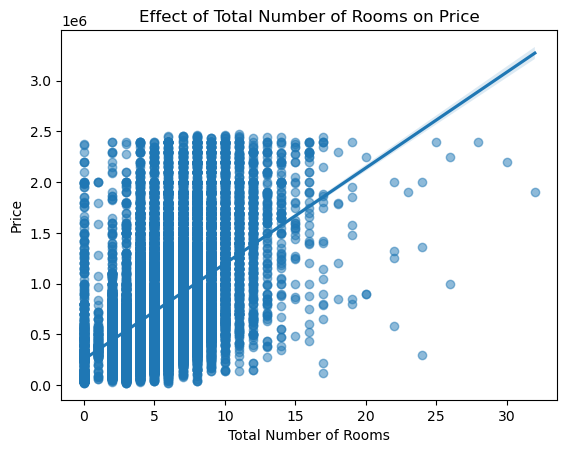

In [20]:
house_listings['Total_Rooms'] = house_listings['Number_Beds'] + house_listings['Number_Baths']

sns.regplot(x='Total_Rooms', y='Price', data=house_listings, scatter_kws={'alpha':0.5})
plt.title('Effect of Total Number of Rooms on Price')
plt.xlabel('Total Number of Rooms')
plt.ylabel('Price')
plt.show()

#### New column - Income per Capita, effect of IPC on housing prices

/var/folders/rm/b98qqlj91xjbfgyzx8m25fzm0000gn/T/ipykernel_11043/708512435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_listings['Income_Per_Capita'] = house_listings['Median_Family_Income'] / house_listings['Population']


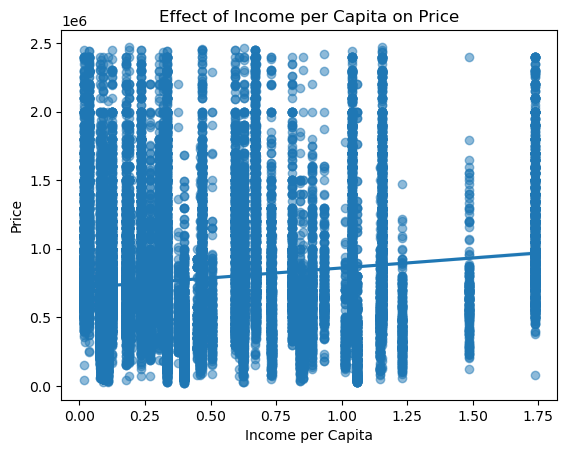

In [21]:
house_listings['Income_Per_Capita'] = house_listings['Median_Family_Income'] / house_listings['Population']

sns.regplot(x='Income_Per_Capita', y='Price', data=house_listings, scatter_kws={'alpha':0.5})
plt.title('Effect of Income per Capita on Price')
plt.xlabel('Income per Capita')
plt.ylabel('Price')
plt.show()

In [22]:
X = house_listings[['Income_Per_Capita', 'Number_Beds', 'Number_Baths', 'Population', 'Total_Rooms', 'Median_Family_Income', 'Population_per_Capita']]
y = house_listings['Price']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Model evaluation
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Model Evaluation:")
print("Train MSE:", mse_train)
print("Test MSE:", mse_test)
print("Train R^2:", r2_train)
print("Test R^2:", r2_test)

Model Evaluation:
Train MSE: 135087432928.00961
Test MSE: 138372665154.15128
Train R^2: 0.40139991504086836
Test R^2: 0.3968289724178363


In [30]:
X = house_listings[['Income_Per_Capita', 'Number_Beds', 'Number_Baths', 'Latitude', 'Longitude', 'Population', 'Total_Rooms', 'Median_Family_Income', 'Population_per_Capita']]
y = house_listings['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R^2:", train_r2)
print("Test R^2:", test_r2)

Train MSE: 73046765014.60754
Test MSE: 84159664093.15314
Train R^2: 0.6763148222156533
Test R^2: 0.6331452385087346


In [24]:
# Assuming you have a DataFrame named house_listings with features and target variable

# Separate features and target variable
X = house_listings[['Population_per_Capita', 'Total_Rooms', 'Income_Per_Capita']]
y = house_listings['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))


Cross-validation scores: [0.37771441 0.3830185  0.38635894 0.36276535 0.35869304]
Mean CV score: 0.37371004907991384
